# **Importing the necessary libraries**

In [1]:
import warnings
warnings.filterwarnings('ignore')
from tensorflow import keras
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

**Mounting the Google drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**unzip dataset**

In [ ]:
%cd /content/drive/MyDrive/Pneumoniadataset/
!unzip /content/drive/MyDrive/chest_xraydataset.zip -d .


Streaming output truncated to the last 5000 lines.
  inflating: ./chest_xray dataset/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: ./chest_xray dataset/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: ./chest_xray dataset/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: ./chest_xray dataset/chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: ./chest_xray dataset/chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: ./chest_xray dataset/chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: ./chest_xray dataset/chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: ./chest_xray dataset/chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating: ./chest_xray dataset/chest_xray/train/NORMAL/IM-0448-0001.jpeg  
  inflating: ./chest_xray dataset/chest_xray/train/NORMAL/IM-0449-0001.jpeg  
  inflating: ./chest_xray dataset/chest_xray/train/NORMAL/IM-0450-0001.jpeg  
  inflating: ./chest_xray dataset/chest_xray/train/NORMAL/IM-0451-0001.jpeg  
  inflating: 

**Data preprocessing**

In [3]:
#Resizing Images to 224
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/chest_xray/train'
valid_path = '/content/drive/MyDrive/chest_xray/val'

**training the VGG16 model**

In [4]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False
    folders = glob('/content/drive/MyDrive/chest_xray/train/*')
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)
# view the structure of the model
model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

**compiling the model**

In [5]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

**Image Data generator**

In [4]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)




# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')




test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical')




Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [8]:
minemodel = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)



Epoch 1/30
522/522 [==============================] - 885s 2s/step - loss: 0.1858 - accuracy: 0.9404 - val_loss: 0.9967 - val_accuracy: 0.7837
Epoch 2/30
522/522 [==============================] - 137s 262ms/step - loss: 0.1901 - accuracy: 0.9471 - val_loss: 0.3359 - val_accuracy: 0.9167
Epoch 3/30
522/522 [==============================] - 142s 272ms/step - loss: 0.1304 - accuracy: 0.9582 - val_loss: 0.5340 - val_accuracy: 0.8718
Epoch 4/30
522/522 [==============================] - 136s 261ms/step - loss: 0.1294 - accuracy: 0.9624 - val_loss: 0.4188 - val_accuracy: 0.9135
Epoch 5/30
522/522 [==============================] - 138s 264ms/step - loss: 0.1646 - accuracy: 0.9578 - val_loss: 0.3582 - val_accuracy: 0.9103
Epoch 6/30
522/522 [==============================] - 135s 259ms/step - loss: 0.0998 - accuracy: 0.9714 - val_loss: 0.5748 - val_accuracy: 0.8846
Epoch 7/30
522/522 [==============================] - 139s 267ms/step - loss: 0.1141 - accuracy: 0.9680 - val_loss: 1.1551 - va

In [12]:
import tensorflow as tf
from keras.models import load_model

model.save('/content/drive/MyDrive/chest_xray/model_vgg16.h5')

In [8]:
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

In [14]:
model=load_model('/content/drive/MyDrive/chest_xray/model_vgg16.h5')

1/1 [==============================] - 1s 1s/step


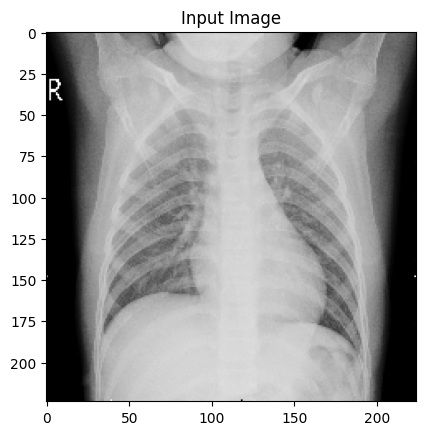

PNEUMONIA


In [15]:
img=image.load_img('/content/drive/MyDrive/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg',target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
img_data=preprocess_input(x)
classes=model.predict(img_data)
result=int(classes[0][0])
plt.imshow(img)
plt.title('Input Image')
plt.show()
if result==0:
    print("PNEUMONIA")
else:
    print("Normal")

1/1 [==============================] - 0s 17ms/step


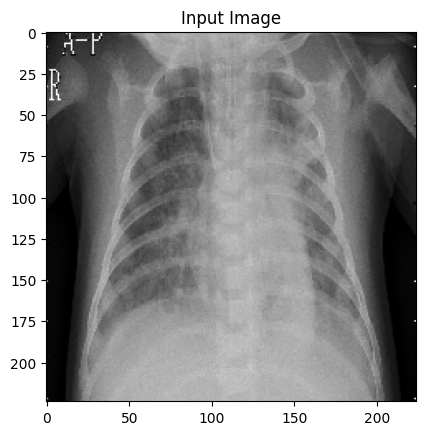

PNEUMONIA


In [16]:
img=image.load_img('/content/drive/MyDrive/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg',target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
img_data=preprocess_input(x)
classes=model.predict(img_data)
result=int(classes[0][0])
plt.imshow(img)
plt.title('Input Image')
plt.show()
if result==0:
    print("PNEUMONIA")
else:
    print("Normal")

63/63 [==============================] - 11s 173ms/step


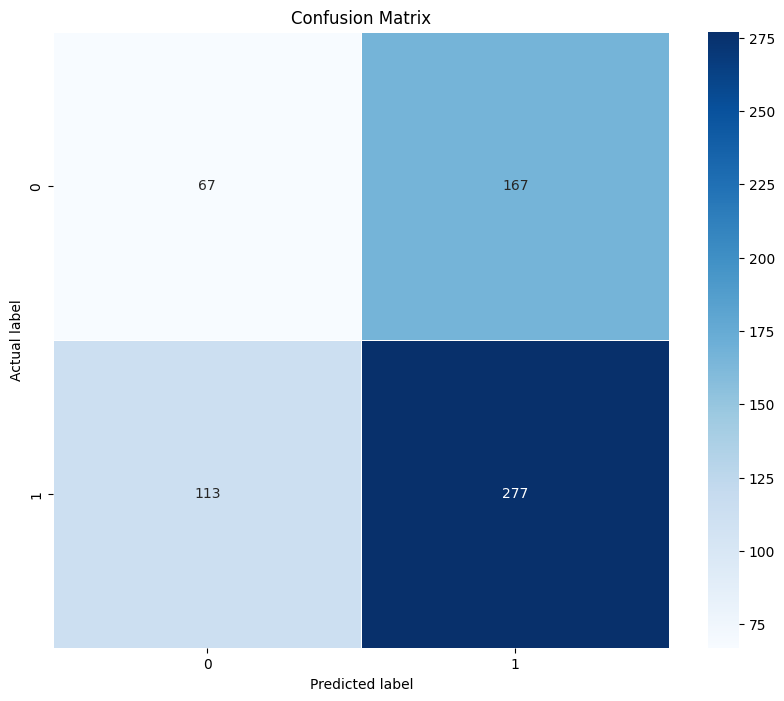

In [21]:
# prompt: generate the confusion matrix on test data using matplotlib

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the values from the test data
y_pred = model.predict(test_set)

# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred,axis=1)

# Convert test labels to one hot vectors
y_true = test_set.classes

# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt="d", linewidths=.5, square=True, cmap="Blues")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# prompt: model=load_model('/content/drive/MyDrive/chest_xray/model_vgg16.h5') here model weight are saved you need to give code for drawing the classification report

# Generate classification report
report = classification_report(y_true, y_pred_classes)

# Print the classification report
print(report)


In [9]:
from sklearn.metrics import classification_report
model=load_model('/content/drive/MyDrive/chest_xray/model_vgg16.h5')
# Get the true labels and predicted labels
true_labels = test_set.classes
predicted_labels = np.argmax(model.predict(test_set), axis=1)

# Generate the classification report
report = classification_report(true_labels, predicted_labels)

# Print the classification report
print(report)


63/63 [==============================] - 401s 6s/step
              precision    recall  f1-score   support

           0       0.38      0.29      0.33       234
           1       0.63      0.72      0.67       390

    accuracy                           0.56       624
   macro avg       0.51      0.51      0.50       624
weighted avg       0.54      0.56      0.54       624

